In [92]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import rcParams
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import cluster

In [93]:
# read file
data=pd.read_csv('datar2.csv')
print('the values',data.columns.values)
data.head()

the values ['age' 'bmi' 'glucose' 'insulin' 'homa' 'leptin' 'adiponectin' 'resistin'
 'mcp_1' 'classification']


,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [94]:
# data clean up
data =data[pd.notnull(data[['age','bmi','glucose','insulin','homa','leptin','adiponectin','resistin','mcp_1','classification']])] 

In [95]:
# describe to data
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             116 non-null    int64  
 1   bmi             116 non-null    float64
 2   glucose         116 non-null    int64  
 3   insulin         116 non-null    float64
 4   homa            116 non-null    float64
 5   leptin          116 non-null    float64
 6   adiponectin     116 non-null    float64
 7   resistin        116 non-null    float64
 8   mcp_1           116 non-null    float64
 9   classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


,count,mean,std,min,25%,50%,75%,max
age,116.0,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000
bmi,116.0,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759
glucose,116.0,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
insulin,116.0,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
homa,116.0,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
leptin,116.0,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000
adiponectin,116.0,10.180874,6.843341,1.656020,5.474282,8.352692,11.815970,38.040000
resistin,116.0,14.725966,12.390646,3.210000,6.881763,10.827740,17.755207,82.100000
mcp_1,116.0,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000
classification,116.0,1.551724,0.499475,1.000000,1.000000,2.000000,2.000000,2.000000


In [96]:
# find columns int and float
colum = data.select_dtypes(include = ["int64","float64"]).keys()
print(colum) 

Index(['age', 'bmi', 'glucose', 'insulin', 'homa', 'leptin', 'adiponectin',
       'resistin', 'mcp_1', 'classification'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245101FA048>,
      dtype=object)

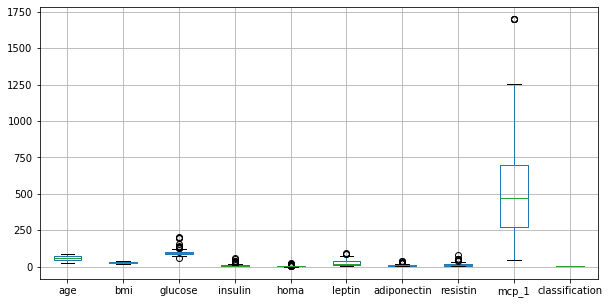

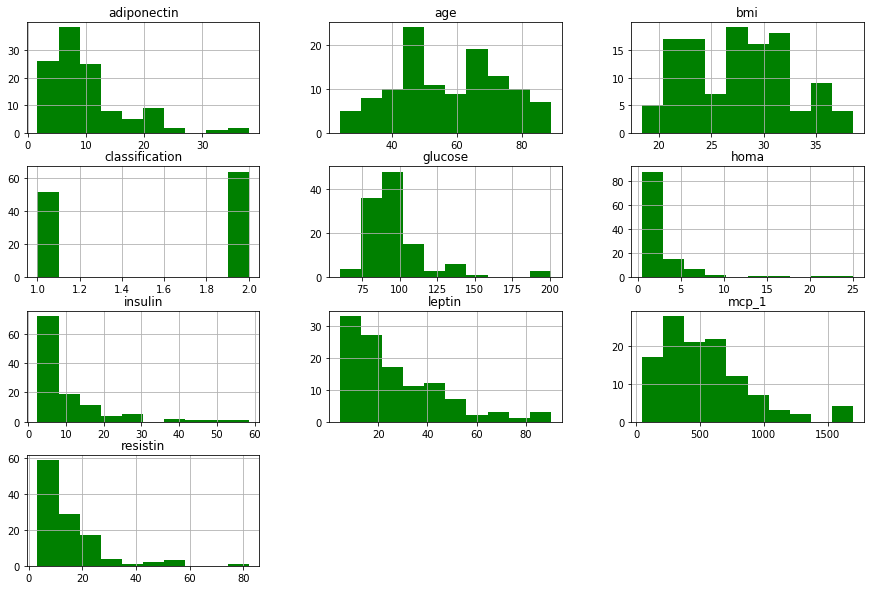

In [119]:
# plot the columns
rcParams['figure.figsize'] = 10,5
data[colum].boxplot()
rcParams['figure.figsize'] = 15,10
data[colum].hist(color='g')

In [98]:
# normalized
rank_df=data.rank(method='first')
normalized_df=(rank_df-rank_df.mean())/rank_df.std()
normalized_df.head(10)

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,-0.579834,-0.698774,-1.680030,-1.620560,-1.709765,-1.293475,0.341953,-0.609569,-0.133808,-1.709765
1,1.531355,-1.561090,-0.223013,-1.442150,-1.323210,-1.263740,-0.906919,-1.590825,-0.014868,-1.680030
2,1.471885,-0.787979,-0.252748,-0.698774,-0.698774,-0.223013,1.531355,-0.371688,0.282483,-1.650295
3,0.609569,-1.293475,-1.531355,-1.382680,-1.501620,-1.085329,-0.460893,0.252748,1.382680,-1.620560
4,1.620560,-1.382680,-0.193278,-1.115064,-1.025859,-1.590825,-1.085329,-0.044603,1.055594,-1.590825
5,-0.460893,-0.936654,-0.163543,-1.352945,-1.263740,-1.561090,1.085329,-0.163543,0.193278,-1.561090
6,1.709765,-0.996124,-1.501620,-0.550098,-0.906919,-1.531355,-0.787979,0.282483,1.590825,-1.531355
7,1.234005,-0.639304,1.352945,0.133808,0.460893,-1.709765,1.025859,-1.234005,-0.817714,-1.501620
8,1.025859,-1.174535,0.341953,-1.293475,-1.055594,-1.680030,0.609569,-0.996124,-1.561090,-1.471885
9,1.115064,-0.847449,-1.174535,-0.460893,-0.669039,-0.282483,0.817714,-0.787979,-0.639304,-1.442150


In [99]:

for n_cluster in [2,4,6,8,10,12]:
    kmeans=KMeans(n_clusters=n_cluster).fit(
        normalized_df[['age','bmi','glucose','insulin','homa','leptin','adiponectin','resistin','mcp_1']])
    
    silhouette_avg=silhouette_score(
        normalized_df[['age','bmi','glucose','insulin','homa','leptin','adiponectin','resistin','mcp_1']],
        kmeans.labels_)
    print('Silhouette score for %i Clusters :%0.4f'%(n_cluster,silhouette_avg))

Silhouette score for 2 Clusters :0.2211
Silhouette score for 4 Clusters :0.1519
Silhouette score for 6 Clusters :0.1468
Silhouette score for 8 Clusters :0.1512
Silhouette score for 10 Clusters :0.1539
Silhouette score for 12 Clusters :0.1492


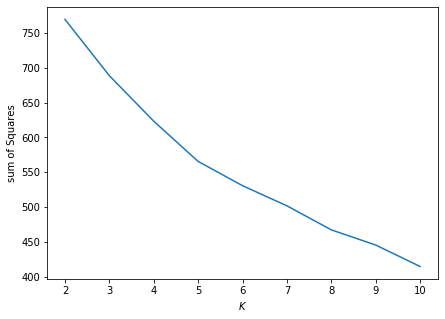

In [131]:
#predict and plot  
sse=[]
krange = list(range(2,11))
X= normalized_df[['age','bmi','glucose','insulin','homa','leptin','adiponectin','resistin','mcp_1']].values
for n in krange:
    model=cluster.KMeans(n_clusters=n,random_state=3)
    model.fit_predict(X)
    cluster_assignments=model.labels_
    centers=model.cluster_centers_
    sse.append(np.sum((X-centers[cluster_assignments])**2))

rcParams['figure.figsize'] = 7,5
plt.plot(krange,sse)
plt.xlabel('$K$')
plt.ylabel('sum of Squares')


plt.show()